# Sucursales Cerradas

In [111]:
import pandas as pd
import numpy as np
import os

dire=os.getcwd()
print(dire)


C:\Users\Consultor\Downloads


In [76]:
def write_parquet_file():
    df = pd.read_csv(dire+"\\Sucursales_cerradas_COVID19.csv",sep="|")
    df.to_parquet('Suc_cerradas.parquet')
write_parquet_file()

df1 = pd.read_parquet('Suc_cerradas.parquet')

def write_parquet_file():
    df = pd.read_csv(dire+"\\Saldos_Atms_Sucursales.csv",sep="|")
    df.to_parquet('Saldos_atm.parquet')
write_parquet_file()

df2 = pd.read_parquet('Saldos_atm.parquet')

df1["CR1"] =pd.to_numeric(df1['CR'],errors = 'coerce')
df1.info()

df2["CR1"]= pd.to_numeric(df2['CR'],errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CR        889 non-null    object 
 1   Sucursal  887 non-null    object 
 2   División  887 non-null    object 
 3   Zona      883 non-null    object 
 4   CR1       887 non-null    float64
dtypes: float64(1), object(4)
memory usage: 34.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9762 entries, 0 to 9761
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CR            9562 non-null   float64
 1   ATM           9562 non-null   object 
 2   SUCURSAL      9562 non-null   object 
 3   DIVISION      9562 non-null   object 
 4   ZONA          9562 non-null   object 
 5   CAS_1         9562 non-null   float64
 6   CAS_2         9562 non-null   float64
 7   CAS_3         9562 non-null   float64
 8   CAS_4         9562 non-null 

In [71]:
#df1[:3]
#df2[:3]

,CR,Sucursal,División,Zona,CR1
0,0007,D.F. CHURUBUSCO,METROPOLITANA SUR,BENITO JUAREZ,7.0
1,0008,D.F. MERCED,METROPOLITANA SUR,CENTRO,8.0
2,0009,LAS TORRES,METROPOLITANA NORTE,VALLEJO,9.0


In [152]:
suc_cerradas=pd.merge(df2,df1, left_on="CR1", right_on="CR1")
#suc_cerradas

In [182]:
cols=["DIVISION","ATM"]
filtro_div=suc_cerradas.groupby(cols).mean()
filtro_div


CR_x  CAS_1  CAS_2  CAS_3  CAS_4  PIEZAS_CAS_1  PIEZAS_CAS_2  \
DIVISION ATM                                                                    
BAJIO    0005   302.0  100.0  200.0  500.0  500.0         895.0        1180.0   
         0007   302.0  100.0  200.0  500.0  500.0         852.0        1470.0   
         0009   302.0  100.0  200.0  500.0  500.0        1041.0        1669.0   
         0013   302.0  100.0  200.0  500.0  500.0        1182.0         793.0   
         0080  5196.0   50.0  200.0  500.0  500.0        2437.0        1512.0   
...               ...    ...    ...    ...    ...           ...           ...   
SURESTE  E824  1407.0   20.0  100.0  200.0  500.0         472.0         848.0   
         E836  4710.0   20.0  100.0  200.0  500.0        1501.0         742.0   
         E841   802.0   20.0  100.0  200.0  500.0         367.0         737.0   
         E952  5057.0   20.0  100.0  200.0  500.0         182.0        1597.0   
         E957  5765.0   20.0  100.0  200.0  500.0         392.0         189.0   

               PIEZAS_CAS_3  PIEZAS_CAS_4    MINIMO     CR1  
DIVISION ATM                                                 
BAJIO    0005        1493.0         200.0  609000.0   302.0  
         0007        1025.0         400.0  585000.0   302.0  
         0009        1004.0         300.0  585000.0   302.0  
         0013        1250.0        1300.0  585000.0   302.0  
         0080         695.0         263.0  563000.0  5196.0  
...                     ...           ...       ...     ...  
SURESTE  E824         669.0         341.0  380000.0  1407.0  
         E836        1059.0         265.0  513000.0  4710.0  
         E841        1088.0        1199.0  369000.0   802.0  
         E952        1733.0        1479.0  372000.0  5057.0  
         E957         250.0        1087.0  510000.0  5765.0  

[3661 rows x 11 columns]

,DIVISION
OCCIDENTE,672
METRO NORTE,588
METRO SUR,522
NOROESTE,458
NORESTE,410
SUR,386
BAJIO,376
SURESTE,249


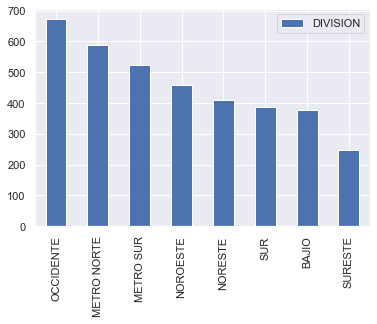

In [171]:
columnas=["DIVISION","ATM"]

base2= suc_cerradas[columnas]  
res=base2["DIVISION"].value_counts().to_frame()

res.plot(kind="bar")
res

# Fallos de distinta índole

## Número de cajeros fuera de servicio

In [173]:
def write_parquet_file():
    df = pd.read_csv(dire+"\\BUC.csv",sep="|")
    df.to_parquet('BUC.parquet')
write_parquet_file()

buc = pd.read_parquet('BUC.parquet')
buc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14807 entries, 0 to 14806
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SK                      14807 non-null  object
 1   ATM                     14807 non-null  object
 2   Marca                   14795 non-null  object
 3   Modelo                  14795 non-null  object
 4   Tipo_dispositivo        14793 non-null  object
 5   Tipo_monitor            14658 non-null  object
 6   Estatus_dispositivo     14801 non-null  object
 7   Sistema_Operativo       14807 non-null  object
 8   Denominacion_caseteros  14284 non-null  object
 9   Biometrico              14285 non-null  object
 10  Geolocaliza             14801 non-null  object
dtypes: object(11)
memory usage: 1.2+ MB


In [176]:
fuera_servicio=pd.merge(buc,df2, left_on="ATM", right_on="ATM")
#fuera_servicio.info()
fs=fuera_servicio["Estatus_dispositivo"].value_counts().to_frame()
fs

,Estatus_dispositivo
ACTIVO,8806
BAJA DEF,719
BAJA TEMP,17


,DIVISION
OCCIDENTE,7
METRO SUR,4
NORESTE,2
NOROESTE,1
BAJIO,1
SUR,1
SURESTE,1


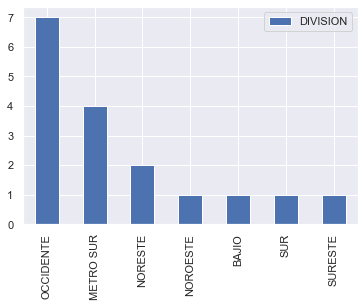

In [179]:
fs1=fuera_servicio[(fuera_servicio["Estatus_dispositivo"]=="BAJA TEMP")]
#fs1
columnas=["DIVISION","ATM"]

fs1= fs1[columnas]  
fuera=fs1["DIVISION"].value_counts().to_frame()

fuera.plot(kind="bar")
fuera

## Fallas Cajeros

In [186]:
def write_parquet_file():
    df = pd.read_csv(dire+"\\Fallas_cajeros.csv",sep="|")
    df.to_parquet('Fallas_cajeros.parquet')
write_parquet_file()

fallas = pd.read_parquet('Fallas_cajeros.parquet')
fallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATM             319 non-null    object 
 1   FALLA           318 non-null    object 
 2   CAUSA           318 non-null    object 
 3   FECHA_INICIO    318 non-null    object 
 4   HORA_INICIO     318 non-null    object 
 5   FRACCION_HRS_F  318 non-null    float64
 6   HRS_FUERA       318 non-null    float64
 7   FAULTID         318 non-null    float64
 8   VENTANA         318 non-null    object 
dtypes: float64(3), object(6)
memory usage: 22.6+ KB


In [188]:
fallas1=pd.merge(fallas,df2, left_on="ATM", right_on="ATM")
fallas1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATM             174 non-null    object 
 1   FALLA           174 non-null    object 
 2   CAUSA           174 non-null    object 
 3   FECHA_INICIO    174 non-null    object 
 4   HORA_INICIO     174 non-null    object 
 5   FRACCION_HRS_F  174 non-null    float64
 6   HRS_FUERA       174 non-null    float64
 7   FAULTID         174 non-null    float64
 8   VENTANA         174 non-null    object 
 9   CR              174 non-null    float64
 10  SUCURSAL        174 non-null    object 
 11  DIVISION        174 non-null    object 
 12  ZONA            174 non-null    object 
 13  CAS_1           174 non-null    float64
 14  CAS_2           174 non-null    float64
 15  CAS_3           174 non-null    float64
 16  CAS_4           174 non-null    float64
 17  PIEZAS_CAS_1    174 non-null    flo

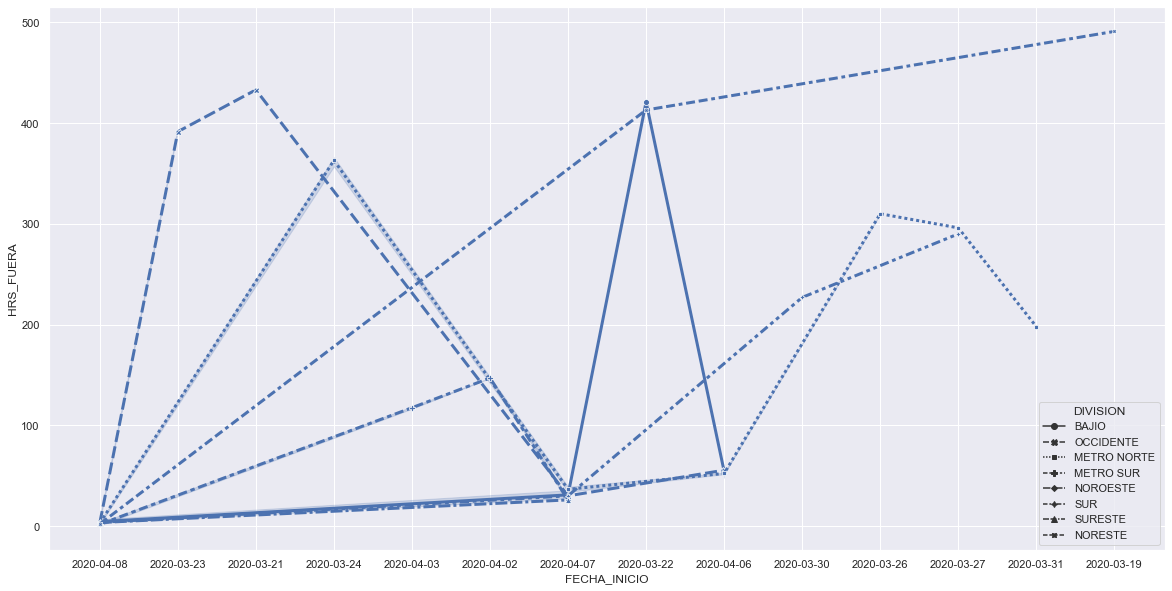

In [205]:
plt.figure(figsize=(20,10))  # Tamaño del gráfico

sns.lineplot(data= fallas1, x='FECHA_INICIO', y='HRS_FUERA', style='DIVISION',
             markers=True,palette="colorblind",linewidth=3)

plt.show()